# National Income Inequality Diagnostic

## Notebook - 04 - Country and Group Comparison

**Objective:**
Compare income inequality across country income groups and
position Germany within these distributions to derive policy-relevant insights.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
gini = pd.read_csv("../data/processed/metadata_country_enriched.csv")

In [ ]:
recent = gini[gini["year"] >= 2000 ]      # focus on recent years
recent["income_group"].value_counts()      

income_group
High income            882
Upper middle income    592
Lower middle income    267
Low income              83
Name: count, dtype: int64

In [11]:
income_group_summary = (                          #income group wise average inequality
    recent.groupby(["income_group","year"])["gini"]
    .mean().reset_index()
) 

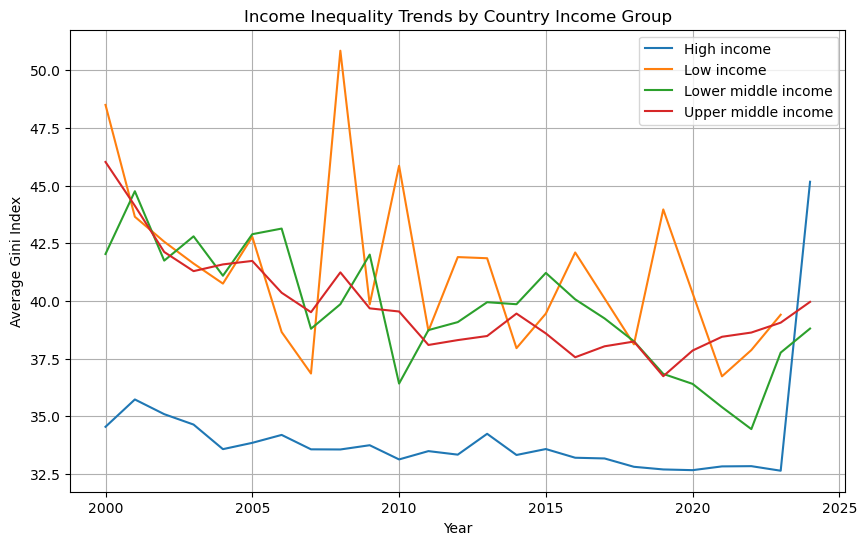

In [12]:
#Income Group Trend Plot
groups = income_group_summary["income_group"].unique()

plt.figure(figsize=(10,6))

for group in groups:
    subset = income_group_summary[income_group_summary["income_group"] == group]
    plt.plot(subset["year"], subset["gini"], label=group)

plt.title("Income Inequality Trends by Country Income Group")
plt.xlabel("Year")
plt.ylabel("Average Gini Index")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Germany Vs high income groups
germany = recent[recent["country"] == "Germany"]

high_income = income_group_summary[
    income_group_summary["income_group"] == "High income"
]

comparison_hi = germany.merge(
    high_income,
    on="year",
    suffixes=("_germany", "_high_income")
)


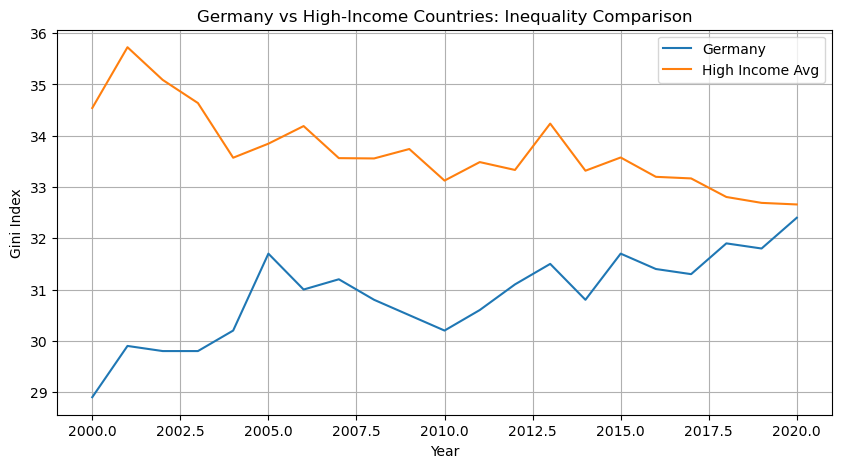

In [14]:
plt.figure(figsize=(10,5))
plt.plot(comparison_hi["year"], comparison_hi["gini_germany"], label="Germany")
plt.plot(comparison_hi["year"], comparison_hi["gini_high_income"], label="High Income Avg")

plt.title("Germany vs High-Income Countries: Inequality Comparison")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# persistance inequality
persistence = (
    recent.groupby("country")["gini"]
    .agg(["mean", "std"])
    .reset_index()
    .sort_values("mean", ascending=False)
)
persistence.head(10)
# High mean + low std -persistently unequal
# High mean + high std - volatile inequality

,country,mean,std
135,South Africa,62.400000,2.675818
105,Namibia,61.133333,2.103172
17,Botswana,57.766667,3.384277
18,Brazil,53.977273,2.328689
29,Colombia,53.631818,2.208293
46,Eswatini,53.033333,1.601041
62,Honduras,52.566667,4.054421
115,Panama,52.243478,2.439789
166,Zambia,51.716667,4.985345
30,Comoros,50.600000,7.495332


In [18]:
persistence[persistence["country"] == "Germany"]

,country,mean,std
54,Germany,30.880952,0.863492


In [19]:
persistence.to_csv(
    "../outputs/tables/inequality_persistence_summary.csv",
    index=False
)


## Key Insights

- Income level alone does not determine inequality.
- High-income countries can still exhibit persistent inequality.
- Germany shows relatively stable inequality compared to global extremes.
- Group averages often hide country-specific inequality patterns.
- Persistence analysis helps distinguish structural inequality from volatility.
